# HOUSEHOLD CONSUMPTIONS

This notebook contains <br>
[0. Import libraries and data](#0.-Import-libraries-and-data) <br>
[1. Building the DataFrame](#1.-Building-the-DataFrame)

## 0. Import libraries and data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

In [2]:
#Obtencion de los datos de precios, desde archivo, si hay tiempo mirar documentacion de la API
#url_price = "https://transparency.entsoe.eu/transmission-domain/r2/dayAheadPrices/export?name=&defaultValue=false&viewType=TABLE&areaType=BZN&atch=false&dateTime.dateTime=01.12.2016+00%3A00%7CUTC%7CDAY&biddingZone.values=CTY%7C10Y1001A1001A83F!BZN%7C10Y1001A1001A82H&dateTime.timezone=UTC&dateTime.timezone_input=UTC&dataItem=ALL&timeRange=YEAR&exportType=CSV"
#https://transparency.entsoe.eu/content/static_content/Static%20content/web%20api/Guide.html#_complete_parameter_list
#https://github.com/EnergieID/entsoe-py
prices_csv="Day-ahead Prices_201601010000-201701010000.csv"
df_prices = pd.read_csv(prices_csv, sep=",")


One consideration with this data is that the prices have negative values that are going to be kept. <br>
This is a consequence of the energy market operation in Germany, when the re

## 1. Building the DataFrame

In [3]:
#Obtener columna con fechas y con formato fecha
df_prices['Datetime'] = df_prices[df_prices.columns[0]].map(lambda x: str(x).split("-")[0].rstrip())
df_prices['Datetime'] = pd.to_datetime(df_prices['Datetime'], format='%d.%m.%Y %H:%M')
df_prices.head(30)


,MTU (UTC),Day-ahead Price [EUR/MWh],Datetime
0,01.01.2016 00:00 - 01.01.2016 01:00,22.39,2016-01-01 00:00:00
1,01.01.2016 01:00 - 01.01.2016 02:00,20.59,2016-01-01 01:00:00
2,01.01.2016 02:00 - 01.01.2016 03:00,16.81,2016-01-01 02:00:00
3,01.01.2016 03:00 - 01.01.2016 04:00,17.41,2016-01-01 03:00:00
4,01.01.2016 04:00 - 01.01.2016 05:00,17.02,2016-01-01 04:00:00
5,01.01.2016 05:00 - 01.01.2016 06:00,15.86,2016-01-01 05:00:00
6,01.01.2016 06:00 - 01.01.2016 07:00,18.16,2016-01-01 06:00:00
7,01.01.2016 07:00 - 01.01.2016 08:00,17.73,2016-01-01 07:00:00
8,01.01.2016 08:00 - 01.01.2016 09:00,19.77,2016-01-01 08:00:00
9,01.01.2016 09:00 - 01.01.2016 10:00,23.75,2016-01-01 09:00:00


In [4]:
df_prices.dtypes

MTU (UTC)                            object
Day-ahead Price [EUR/MWh]           float64
Datetime                     datetime64[ns]
dtype: object

In [5]:
#Quedarse solo con las columnas que vamos a emplear y obtener algunas para el estudio posterior
df_prices_clean = pd.DataFrame()
df_prices_clean['Datetime'] = df_prices['Datetime']
df_prices_clean['Price'] = df_prices[df_prices.columns[1]]
df_prices_clean['Date'] =df_prices_clean['Datetime'].map(lambda x: x.date())
df_prices_clean['Hour'] = df_prices_clean['Datetime'].map(lambda x: x.hour)
df_prices_clean['DayofWeek'] = df_prices_clean['Datetime'].map(lambda x: x.dayofweek)
df_prices_clean['DayofWeek_Str'] = df_prices_clean['Datetime'].map(lambda x: x.strftime("%A"))

,Datetime,Price,Date,Hour,DayofWeek,DayofWeek_Str,DayMean
0,2016-01-01 00:00:00,22.39,2016-01-01,0,4,Friday,24.880000
1,2016-01-01 01:00:00,20.59,2016-01-01,1,4,Friday,24.880000
2,2016-01-01 02:00:00,16.81,2016-01-01,2,4,Friday,24.880000
3,2016-01-01 03:00:00,17.41,2016-01-01,3,4,Friday,24.880000
4,2016-01-01 04:00:00,17.02,2016-01-01,4,4,Friday,24.880000
5,2016-01-01 05:00:00,15.86,2016-01-01,5,4,Friday,24.880000
6,2016-01-01 06:00:00,18.16,2016-01-01,6,4,Friday,24.880000
7,2016-01-01 07:00:00,17.73,2016-01-01,7,4,Friday,24.880000
8,2016-01-01 08:00:00,19.77,2016-01-01,8,4,Friday,24.880000
9,2016-01-01 09:00:00,23.75,2016-01-01,9,4,Friday,24.880000


In [6]:
df_prices_clean.head(12)

,Datetime,Price,Date,Hour,DayofWeek,DayofWeek_Str
0,2016-01-01 00:00:00,22.39,2016-01-01,0,4,Friday
1,2016-01-01 01:00:00,20.59,2016-01-01,1,4,Friday
2,2016-01-01 02:00:00,16.81,2016-01-01,2,4,Friday
3,2016-01-01 03:00:00,17.41,2016-01-01,3,4,Friday
4,2016-01-01 04:00:00,17.02,2016-01-01,4,4,Friday
5,2016-01-01 05:00:00,15.86,2016-01-01,5,4,Friday
6,2016-01-01 06:00:00,18.16,2016-01-01,6,4,Friday
7,2016-01-01 07:00:00,17.73,2016-01-01,7,4,Friday
8,2016-01-01 08:00:00,19.77,2016-01-01,8,4,Friday
9,2016-01-01 09:00:00,23.75,2016-01-01,9,4,Friday


In [7]:
#Normalizacion de precios, dividiendo entre la media del dia
df_daymean = pd.DataFrame(df_prices_clean.groupby(df_prices_clean['Date'])['Price'].mean())
df_daymean.rename(columns={'Price' : 'DayMean'},inplace=True)
df_prices_clean = df_prices_clean.merge(df_daymean,left_on='Date', right_on='Date', how='outer')
df_prices_clean['Price_nom'] = df_prices_clean['Price']/df_prices_clean['DayMean']

In [46]:
df_prices_clean.to_csv('Prices.csv')

## 2. Exploring the dataframe

In [5]:
mean_byhour = df_prices_clean.groupby('Hour').mean()
mean_bydayofweek= df_prices_clean.groupby('DayofWeek').mean()

In [14]:
mean_bydayofweek.head()

,Price,Hour
DayofWeek,,
0,30.019928,11.5
1,32.166627,11.5
2,31.506707,11.5
3,31.684135,11.5
4,31.032028,11.5


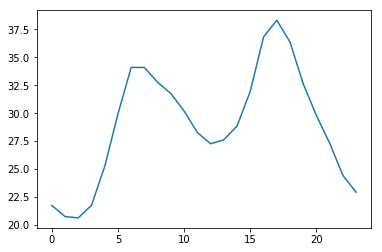

In [76]:
#Precio medio para cada hora de todo el año
plt.plot(mean_byhour)

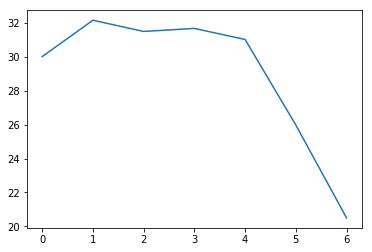

In [77]:
#Precio medio de cada dia de la semana, se observa que en el fin de semana el precio medio es más bajo
plt.plot(mean_bydayofweek)

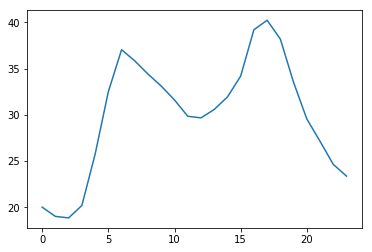

In [15]:
#Forma de los precios de un dia de la semana según la hora 
monday_hours = df_prices_clean[df_prices_clean['DayofWeek']==0].groupby('Hour').mean()
plt.plot(monday_hours['Price'])

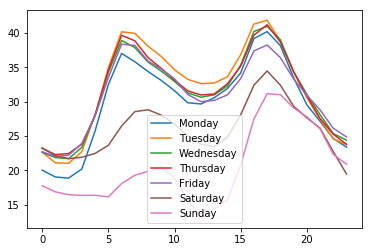

In [24]:
#Grafica con el precio medio de cada hora por cada dia de la semana

for i in list(range(0,7)):
    day_hours=df_prices_clean[df_prices_clean['DayofWeek']==i].groupby('Hour').mean()
    day_name = df_prices_clean["DayofWeek_Str"][df_prices_clean['DayofWeek']==i].iloc[0]
    plt.plot(day_hours['Price'], label = day_name)
    plt.legend()


In [ ]:
#From the graph it can be seen that there are 3 diferent behaviours:
#weekdays
#saturday
#sunday


## 3. Modelling the prices
##### Weekdays

In [8]:
df_weekdays = df_prices_clean[df_prices_clean['DayofWeek'] <=4]
df_weekdays.head()

,Datetime,Price,Date,Hour,DayofWeek,DayofWeek_Str,DayMean,Price_nom
0,2016-01-01 00:00:00,22.39,2016-01-01,0,4,Friday,24.88,0.899920
1,2016-01-01 01:00:00,20.59,2016-01-01,1,4,Friday,24.88,0.827572
2,2016-01-01 02:00:00,16.81,2016-01-01,2,4,Friday,24.88,0.675643
3,2016-01-01 03:00:00,17.41,2016-01-01,3,4,Friday,24.88,0.699759
4,2016-01-01 04:00:00,17.02,2016-01-01,4,4,Friday,24.88,0.684084


In [9]:
df_weekdays.iloc[:,1:4].head()

,Price,Date,Hour
0,22.39,2016-01-01,0
1,20.59,2016-01-01,1
2,16.81,2016-01-01,2
3,17.41,2016-01-01,3
4,17.02,2016-01-01,4


In [10]:
dfscale_weekdays= pd.DataFrame(scale(df_weekdays.iloc[:,1:4]), index=df_weekdays.iloc[:,1:4].index, columns=df_weekdays.iloc[:,1:4].columns)
dfscale_weekdays.head()

NameError: name 'scale' is not defined

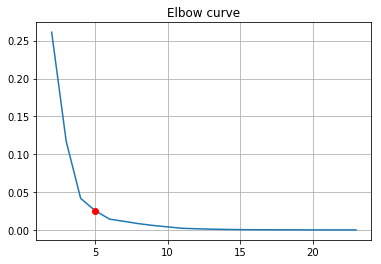

In [11]:
# Data values
df_weekdaysH = df_weekdays.groupby('Hour').mean()
prices = df_weekdaysH['Price_nom'].values
X = np.array(list(zip(prices)))

#Elbow Method to identify the best number of clusters
center_distances = []
for k in list(df_weekdaysH.index[2:]):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    center_distances.append(kmeans.inertia_)

plt.plot(list(df_weekdaysH.index[2:]), center_distances)
plt.grid(True)
plt.title('Elbow curve')

#Given the graph the results the chosen number of clusters is 5
n_clusters = 5
plt.plot(n_clusters,center_distances[n_clusters-2], marker='o', color='r')

Once the number of clusters is set KMeans can be run to group the data

In [12]:
np.random.seed(1)

# Initializing KMeans
kmeans = KMeans(n_clusters=5)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
cluster_num = kmeans.predict(X)
# Getting the cluster centers
cluster_centers = kmeans.cluster_centers_
# Add the cluster to a column in the dataframe
df_weekdaysH['Cluster'] = pd.Series(cluster_num, index=df_weekdaysH.index)

In [117]:
df_weekdaysH.sample(5)

,Price,DayofWeek,DayMean,Price_nom,Cluster
Hour,,,,,
3,22.811762,2.007663,31.280928,0.714508,2
11,31.412759,2.007663,31.280928,0.916077,0
17,40.512605,2.007663,31.280928,1.328299,1
13,31.125939,2.007663,31.280928,0.931068,0
20,30.608276,2.007663,31.280928,1.042055,3


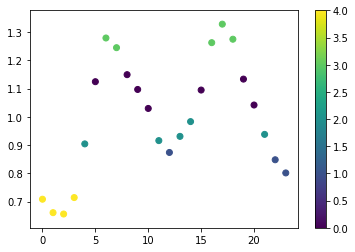

In [15]:
#Plot
X = df_weekdaysH.index
y = df_weekdaysH['Price_nom']
color = df_weekdaysH['Cluster']
plt.scatter(X,y, c= color)
plt.colorbar()

In [14]:
df_weekdaysH

,Price,DayofWeek,DayMean,Price_nom,Cluster
Hour,,,,,
0,22.245594,2.007663,31.280928,0.708656,4
1,21.259004,2.007663,31.280928,0.661082,4
2,21.253985,2.007663,31.280928,0.656253,4
3,22.811762,2.007663,31.280928,0.714508,4
4,27.572759,2.007663,31.280928,0.904484,2
5,33.968161,2.007663,31.280928,1.124620,0
6,38.846092,2.007663,31.280928,1.279275,3
7,38.162261,2.007663,31.280928,1.245008,3
8,36.130077,2.007663,31.280928,1.149510,0


To reference the cluster the following names are given
<p>LowLow Price &#9658; Cluster 4</p>
<p>Low Price &#9658; Cluster 1 </p>
<p>Standard price &#9658; Cluster 2 </p>
<p>High Price &#9658; Cluster 0 </p>
<p>HighHigh Price &#9658; Cluster 3 </p>